## Loading Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, roc_auc_score,roc_curve, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Loading Data

In [3]:
df = pd.read_csv("electricity_usage.csv")

In [4]:
df.head()

,Meter_Id,Date,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Expected_Energy(kwh),Actual_Energy(kwh),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage
0,IN-KL-ELC-97400511,25-01-2023,IN_KL_TVM,Independent House,2,2458,6,7.21,29.52,83.53,12.82 kWh,19.886033739870022 kWh,55.12,16.89,1
1,IN-KL-ELC-28113115,04-01-2023,IN_KL_ALP,Independent House,3,2295,9,7.98,25.83,48.79,14.66 kWh,15.51 kWh,5.80,17.83,0
2,IN-KL-ELC-17499006,04-01-2023,IN_KL_TVM,Apartment,3,2424,16,5.47,31.91,46.66,16.67 kWh,15.11 kWh,-9.36,17.26,0
3,IN-KL-ELC-22187937,21-01-2023,IN_KL_ERN,Apartment,1,2787,18,5.41,21.15,58.49,12.71 kWh,21.26104008352499 kWh,67.28,16.61,1
4,IN-KL-ELC-57403818,28-01-2023,IN_KL_ERN,Independent House,4,2389,10,2.99,30.91,77.26,13.53 kWh,12.67 kWh,-6.36,16.43,0


## Pre-Processing Data

In [16]:
df.describe(include = 'all')

,Meter_Id,Date,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Expected_Energy(kwh),Actual_Energy(kwh),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage
count,10800,10800,10800,10800,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10133,9900,10800.000000,10800.000000,10800.000000
unique,360,30,3,3,NaN,NaN,NaN,NaN,NaN,NaN,1424,4385,NaN,NaN,NaN
top,IN-KL-ELC-97400511,25-01-2023,IN_KL_ERN,Independent House,NaN,NaN,NaN,NaN,NaN,NaN,14.68 kWh,15.07 kWh,NaN,NaN,NaN
freq,30,360,4260,4650,NaN,NaN,NaN,NaN,NaN,NaN,24,17,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.527778,1673.255556,13.508333,5.314472,29.954353,64.754650,NaN,NaN,15.802278,16.775722,0.438796
std,NaN,NaN,NaN,NaN,1.701159,708.161742,4.731902,1.546343,3.992592,11.491137,NaN,NaN,26.914769,0.499606,0.496263
min,NaN,NaN,NaN,NaN,1.000000,450.000000,6.000000,2.510000,12.870000,45.000000,NaN,NaN,-37.240000,16.020000,0.000000
25%,NaN,NaN,NaN,NaN,2.000000,1003.250000,9.000000,3.920000,27.307500,54.777500,NaN,NaN,-2.492500,16.430000,0.000000
50%,NaN,NaN,NaN,NaN,4.000000,1775.500000,14.000000,5.335000,29.970000,64.525000,NaN,NaN,4.025000,16.610000,0.000000
75%,NaN,NaN,NaN,NaN,5.000000,2279.500000,18.000000,6.662500,32.650000,74.632500,NaN,NaN,33.000000,16.982500,1.000000


In [6]:
df.columns

Index(['Meter_Id', 'Date', 'Region_Code', 'Dwelling_Type', 'Num_Occupants',
       'House_Area (sqft)', 'Appliance_Score', 'Connected_Load(kw)',
       'Temperature_C', 'Humidity (%)', 'Expected_Energy(kwh)',
       'Actual_Energy(kwh)', 'Usage_Deviation(%)', 'Cluster_Avg_Energy(kwh)',
       'Abnormal_Usage'],
      dtype='object')

In [7]:
df.dtypes

Meter_Id                    object
Date                        object
Region_Code                 object
Dwelling_Type               object
Num_Occupants                int64
House_Area (sqft)            int64
Appliance_Score              int64
Connected_Load(kw)         float64
Temperature_C              float64
Humidity (%)               float64
Expected_Energy(kwh)        object
Actual_Energy(kwh)          object
Usage_Deviation(%)         float64
Cluster_Avg_Energy(kwh)    float64
Abnormal_Usage               int64
dtype: object

In [8]:
df.head()

,Meter_Id,Date,Region_Code,Dwelling_Type,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Expected_Energy(kwh),Actual_Energy(kwh),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage
0,IN-KL-ELC-97400511,25-01-2023,IN_KL_TVM,Independent House,2,2458,6,7.21,29.52,83.53,12.82 kWh,19.886033739870022 kWh,55.12,16.89,1
1,IN-KL-ELC-28113115,04-01-2023,IN_KL_ALP,Independent House,3,2295,9,7.98,25.83,48.79,14.66 kWh,15.51 kWh,5.80,17.83,0
2,IN-KL-ELC-17499006,04-01-2023,IN_KL_TVM,Apartment,3,2424,16,5.47,31.91,46.66,16.67 kWh,15.11 kWh,-9.36,17.26,0
3,IN-KL-ELC-22187937,21-01-2023,IN_KL_ERN,Apartment,1,2787,18,5.41,21.15,58.49,12.71 kWh,21.26104008352499 kWh,67.28,16.61,1
4,IN-KL-ELC-57403818,28-01-2023,IN_KL_ERN,Independent House,4,2389,10,2.99,30.91,77.26,13.53 kWh,12.67 kWh,-6.36,16.43,0


In [9]:
df.isna().sum()

Meter_Id                     0
Date                         0
Region_Code                  0
Dwelling_Type                0
Num_Occupants                0
House_Area (sqft)            0
Appliance_Score              0
Connected_Load(kw)           0
Temperature_C                0
Humidity (%)                 0
Expected_Energy(kwh)       667
Actual_Energy(kwh)         900
Usage_Deviation(%)           0
Cluster_Avg_Energy(kwh)      0
Abnormal_Usage               0
dtype: int64

In [10]:
df_use = df.drop(columns = ['Meter_Id', 'Date',"Region_Code","Expected_Energy(kwh)","Actual_Energy(kwh)"],axis=1)

In [11]:
df_use = pd.get_dummies(df_use,columns =["Dwelling_Type"],dtype = int)

In [12]:
df_use.head()

,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage,Dwelling_Type_Apartment,Dwelling_Type_Independent House,Dwelling_Type_Villa
0,2,2458,6,7.21,29.52,83.53,55.12,16.89,1,0,1,0
1,3,2295,9,7.98,25.83,48.79,5.80,17.83,0,0,1,0
2,3,2424,16,5.47,31.91,46.66,-9.36,17.26,0,1,0,0
3,1,2787,18,5.41,21.15,58.49,67.28,16.61,1,1,0,0
4,4,2389,10,2.99,30.91,77.26,-6.36,16.43,0,0,1,0


In [13]:
X = df_use.drop(columns = "Abnormal_Usage", axis = 1)

In [14]:
y = df["Abnormal_Usage"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y, random_state = 1729)

## Model Training and Testing

In [18]:
knn = KNeighborsClassifier(n_neighbors = 7)

In [19]:
knn.fit(X_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",7
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [20]:
knn.score(X_test,y_test)

0.8740740740740741

In [21]:
y_pred = knn.predict(X_test)

In [22]:
x = confusion_matrix(y_test,y_pred)

In [23]:
x

array([[1183,   29],
       [ 243,  705]])

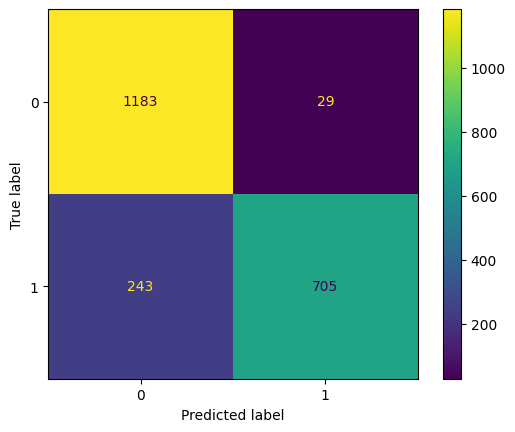

In [24]:
y= ConfusionMatrixDisplay(x)
y.plot()
plt.show()

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1212
           1       0.96      0.74      0.84       948

    accuracy                           0.87      2160
   macro avg       0.90      0.86      0.87      2160
weighted avg       0.89      0.87      0.87      2160



## Logistic Regression

In [26]:
log = LogisticRegression(max_iter=1000)

In [27]:
X = df_use.drop(columns = "Abnormal_Usage", axis = 1)
y = df["Abnormal_Usage"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y, random_state = 1729)

In [29]:
log.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [30]:
log.score(X_test,y_test)

0.8407407407407408

In [31]:
y_pred_prob = log.predict_proba(X_test)

In [32]:
log.classes_  # shows [negative_class, positive_class]

array([0, 1])

In [33]:
print(y_pred_prob)

[[0.86007061 0.13992939]
 [0.73629003 0.26370997]
 [0.91560905 0.08439095]
 ...
 [0.86499058 0.13500942]
 [0.68474748 0.31525252]
 [0.87684899 0.12315101]]


In [34]:
for i in y_pred_prob:
    print(i)

[0.86007061 0.13992939]
[0.73629003 0.26370997]
[0.91560905 0.08439095]
[0.24822422 0.75177578]
[0.88357327 0.11642673]
[0.82397099 0.17602901]
[0.84078123 0.15921877]
[0.3532464 0.6467536]
[0.02611577 0.97388423]
[0.74285702 0.25714298]
[0.75440362 0.24559638]
[0.08695541 0.91304459]
[0.09561831 0.90438169]
[0.14098347 0.85901653]
[0.8450313 0.1549687]
[0.82372188 0.17627812]
[0.63772753 0.36227247]
[0.77268865 0.22731135]
[0.89223976 0.10776024]
[0.82270417 0.17729583]
[0.42217003 0.57782997]
[0.87178334 0.12821666]
[0.44308186 0.55691814]
[0.06134487 0.93865513]
[0.00116869 0.99883131]
[0.84917852 0.15082148]
[0.80913579 0.19086421]
[0.15366369 0.84633631]
[0.00902484 0.99097516]
[0.80500397 0.19499603]
[0.63649298 0.36350702]
[0.15424448 0.84575552]
[0.92501182 0.07498818]
[0.71923141 0.28076859]
[0.70171902 0.29828098]
[0.00257277 0.99742723]
[0.0796189 0.9203811]
[0.82609789 0.17390211]
[0.83237136 0.16762864]
[0.15359677 0.84640323]
[0.20682633 0.79317367]
[0.79011686 0.20988314

In [35]:
df_use.tail()

,Num_Occupants,House_Area (sqft),Appliance_Score,Connected_Load(kw),Temperature_C,Humidity (%),Usage_Deviation(%),Cluster_Avg_Energy(kwh),Abnormal_Usage,Dwelling_Type_Apartment,Dwelling_Type_Independent House,Dwelling_Type_Villa
10795,4,1364,9,7.04,32.65,47.38,-5.82,16.47,1,1,0,0
10796,3,2673,21,6.26,25.62,48.69,35.97,16.47,1,1,0,0
10797,5,2520,15,6.56,27.33,67.33,14.30,16.28,0,0,0,1
10798,3,2379,14,4.54,34.11,70.00,-8.02,17.83,0,0,1,0
10799,6,2560,21,4.08,25.73,73.94,0.58,16.89,0,0,1,0


In [36]:
y_pos = y_pred_prob[:,1]

## ROC CURVE

In [38]:
# calculates using y_test and their prob of being +ve
# For each threshold  it calculates FPR and TPR using probability estimates of the positive
fpr, tpr, thresholds = roc_curve(y_test,y_pos) 
# second argument of roc_curve can be Target scores, can either be probability estimates of the positive
# class, confidence values, or non-thresholded measure of decisions

In [39]:
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.25082508e-04,
        8.25082508e-04, 1.65016502e-03, 1.65016502e-03, 2.47524752e-03,
        2.47524752e-03, 3.30033003e-03, 3.30033003e-03, 4.95049505e-03,
        4.95049505e-03, 7.42574257e-03, 7.42574257e-03, 8.25082508e-03,
        8.25082508e-03, 9.07590759e-03, 9.07590759e-03, 9.90099010e-03,
        9.90099010e-03, 1.32013201e-02, 1.32013201e-02, 1.40264026e-02,
        1.40264026e-02, 1.48514851e-02, 1.48514851e-02, 1.56765677e-02,
        1.56765677e-02, 2.39273927e-02, 2.39273927e-02, 2.47524752e-02,
        2.47524752e-02, 2.64026403e-02, 2.64026403e-02, 2.72277228e-02,
        2.72277228e-02, 2.80528053e-02, 2.80528053e-02, 2.88778878e-02,
        2.88778878e-02, 3.21782178e-02, 3.21782178e-02, 3.38283828e-02,
        3.38283828e-02, 3.54785479e-02, 3.54785479e-02, 3.63036304e-02,
        3.63036304e-02, 3.71287129e-02, 3.71287129e-02, 3.87788779e-02,
        3.87788779e-02, 4.04290429e-02, 4.04290429e-02, 4.125412

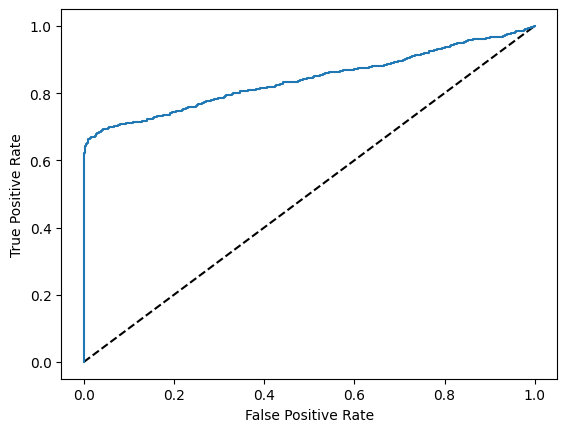

In [40]:
plt.plot([0,1],[0,1],'k--') # plots random model TPR = FPR
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [41]:
roc_auc_score(y_test,y_pos) # Area under curve

0.8397346854938659

In [42]:
y_pred = log.predict(X_test)

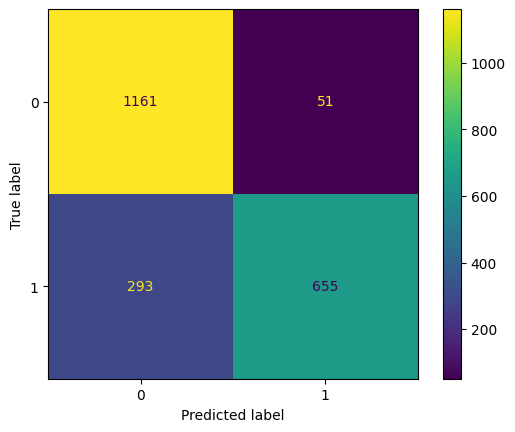

In [43]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.show()


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1212
           1       0.93      0.69      0.79       948

    accuracy                           0.84      2160
   macro avg       0.86      0.82      0.83      2160
weighted avg       0.86      0.84      0.84      2160



## Grid Search CV

In [45]:
kf = KFold(n_splits=5,shuffle = True, random_state=1729)

In [46]:
knn = KNeighborsClassifier() 

In [47]:
para = {"n_neighbors" : np.arange(1,25),"p":[1,2]}

In [97]:
grid = GridSearchCV(knn,param_grid = para,cv=kf)

In [98]:
grid

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_neighbors': array([ 1, 2..., 22, 23, 24]), 'p': [1, 2]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",KFold(n_split... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score 

In [99]:
grid.fit(X_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_neighbors': array([ 1, 2..., 22, 23, 24]), 'p': [1, 2]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",KFold(n_split... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score 

In [100]:
grid.best_params_

{'n_neighbors': np.int64(5), 'p': 1}

In [101]:
grid.best_score_

np.float64(0.8729166666666666)

In [102]:
grid.best_estimator_

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",np.int64(5)
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",1
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [103]:
grid.score(X_test,y_test)

0.8800925925925925

## Randomized Search CV

In [48]:
rgrid = RandomizedSearchCV(knn,param_distributions = para,cv=kf,n_iter=3)

In [49]:
rgrid

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'n_neighbors': array([ 1, 2..., 22, 23, 24]), 'p': [1, 2]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",3
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.

In [50]:
rgrid.fit(X_train,y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'n_neighbors': array([ 1, 2..., 22, 23, 24]), 'p': [1, 2]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",3
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.

In [51]:
rgrid.best_estimator_

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",np.int64(7)
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",1
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [52]:
rgrid.best_params_

{'p': 1, 'n_neighbors': np.int64(7)}

In [53]:
rgrid.best_score_

np.float64(0.8701388888888889)

In [113]:
rgrid.score(X_test,y_test)

0.8763888888888889